# 1 공공데이터 상권정보 분석 ( 의료기관)   
  
  - https://www.data.go.kr/data/15012005/fileData.do#layer_data_infomation
  - 국가중점데이터인 상권정보 살펴보기.


# 1.1 필요한 라이브러리 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


# 1.2 시각화를 위한 폰트 설정

In [2]:
import matplotlib.pyplot as plt
# 윈도우의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')

# 시각화 그래프가 노트북 안에 보이게 하기
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 1.3 데이터 로드하기

In [4]:
df = pd.read_csv('./data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv',low_memory = False)

df.shape

(91335, 39)

In [5]:
# 위에서 5개 출력
df.head()

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873     하나산부인과  NaN         S       의료       S01       병원    S01B10   
1  20024149   타워광명내과의원  NaN         S       의료       S01       병원    S01B07   
2  20152277  조정현신경외과의원  NaN         S       의료       S01       병원    S01B15   
3  20350610   한귀원정신과의원  NaN         S       의료       S01       병원    S01B99   
4  20364049  더블유스토어수지점  수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   
1    내과/외과   Q86201  ...  1168011800104670014000001      NaN   
2     신경외과   Q86201  ...  4139013200117400001017064    한라프라자   
3     기타병원      NaN  ...  2650010400100740001009932      NaN   
4       약국   G47811  ...  4146510100107120002026238      NaN   

                 도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
0   경기도 안산시 단원구 달미로 10  425764.0  15236.0  NaN  NaN  NaN  126.814295   
1  서울특별시 강남구 언주로30길 39  135270.0   6292.0  NaN    4  NaN  127.053198   
2    경기도 시흥시 중심상가로 178  429450.0  15066.0  NaN  NaN  NaN  126.734841   
3    부산광역시 수영구 수영로 688  613100.0  48266.0  NaN    5  NaN  129.115438   
4   경기도 용인시 수지구 문정로 32  448170.0  16837.0  NaN    1  NaN  127.095522   

          위도  
0  37.336344  
1  37.488742  
2  37.344955  
3  35.166872  
4  37.323528  

[5 rows x 39 columns]

In [6]:
# tail : 뒤에 있는 5개 데이터 출력
df.tail()

상가업소번호           상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
91330  16196725         온누리약국   베스트         S       의료       S02    약국/한약방   
91331  16192180            리원  봄산후조         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원   NaN         S       의료       S01        병원   
91333  16108681       경희중앙한의원   NaN         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원   NaN         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호    건물명  \
91330    S02A01       약국   G47811  ...  3017011200115070000021096    NaN   
91331    S07A07    산후조리원   S96993  ...  4128112300111460000011715  청한프라자   
91332    S01B17  노인/치매병원   Q86102  ...  2641010800105380001005572  한신시티빌   
91333    S01B06      한의원   Q86203  ...  1174010500103450009002392    NaN   
91334    S01B13     안과의원   Q86201  ...  4413110700102660017016314    김안과   

                     도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
91330      대전광역시 서구 문예로 67  302831.0  35240.0  NaN  NaN  NaN  127.389865   
91331   경기도 고양시 덕양구 성신로 14  412827.0  10503.0  NaN  NaN  NaN  126.830144   
91332    부산광역시 금정구 금강로 209  609841.0  46294.0  NaN    2  NaN  129.082790   
91333    서울특별시 강동구 천중로 213  134811.0   5303.0  NaN  NaN  NaN  127.143958   
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  NaN  NaN  NaN  127.152651   

              위도  
91330  36.352728  
91331  37.627530  
91332  35.227138  
91333  37.540993  
91334  36.806640  

[5 rows x 39 columns]

# 1.5 데이터 요약하기
## 1.5.1 요약정보

In [7]:
# info로 데이터 요약( 컬럼명 출력, 개수, d-type) 결측치 확인할 수 있음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

# 1.5.2 컬럼명 보기


In [8]:
# 컬럼명만 출력
df.columns


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

# 1.5.3 데이터 타입

In [9]:
# 데이터 타입만 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

# 1.6 결측치

In [10]:
#각 컬럼의 결측치 개수 합
null_count = df.isnull().sum()

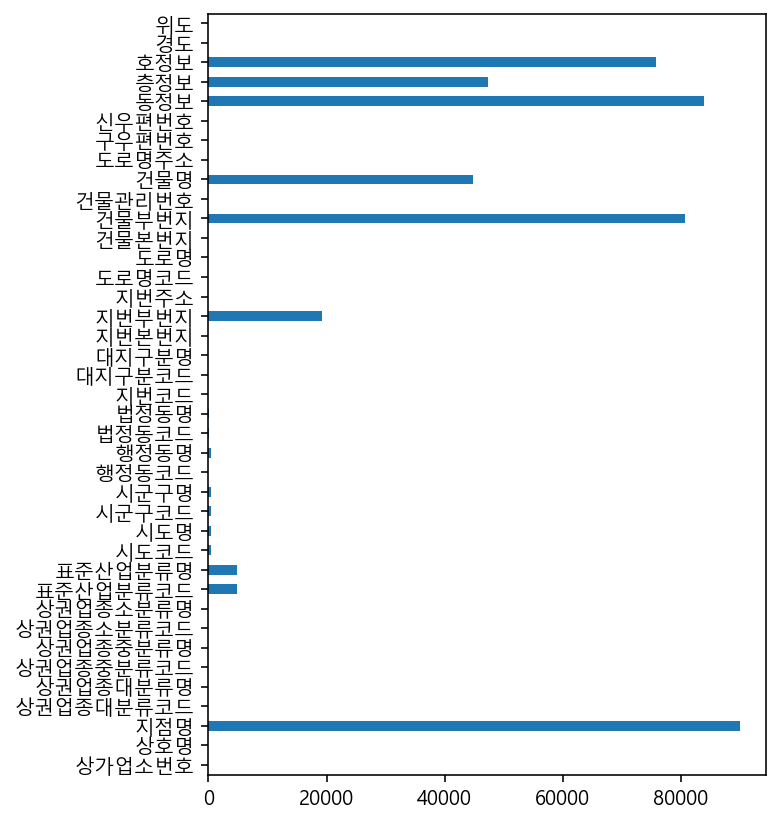

In [11]:
# 위에서 구한 결측치를 .plot.bar를 통해 막대그래프로 표현.
# null_count.plot()
#null_count.plot.bar()

# 글씨 회전
#rot = null_count.plot.bar(rot = 60)

# x, y축 전환, 사이즈 조절
inv = null_count.plot.barh(figsize=(5,7))

In [12]:
# 위에서 계산한 결측치 수를 reset_index를 통해 데이터 프레임으로 만들기
# df_null_count 변수에 결과를 담아서 head로 미리보기

df_null_count = null_count.reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

# 1.7 컬럼명 변경하기

In [13]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 '컬럼명', '결측치 수'로 변경하기.

df_null_count.columns = ['컬럼명', '결측치 수']
df_null_count.head()

컬럼명  결측치 수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

# 1.8 정렬하기

In [14]:
# df_null_count 데이터프레임에 있는 결측치 수 컬럼을 sort_values를 통해 정렬
# 결측치 수가 적은 순으로 출력
# df_null_count.sort_values(by='결측치 수')

# 결측 수가 많은 순으로  출력
df_null_count_top = df_null_count.sort_values(by='결측치 수', ascending=False).head(10)

 # 1.9 특정 컬럼만 불러오기
 

In [15]:
# 지점명 컬럼을 불러오기
# nan == Not a Number 의 약자로 결측치 의미

df['지점명'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [16]:
# '컬럼명'이라는 컬럼의 값만 가져와서 drop_columns라는 변수에 담기
# 왜냐하면 결측치가 너무 많기 때문에
drop_columns = df_null_count_top['컬럼명'].tolist()

In [17]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져오기
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명  시도코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원  41.0
1  NaN  NaN    NaN  NaN    4      NaN   14.0   Q86201           일반 의원  11.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원  41.0
3  NaN  NaN    NaN  NaN    5      NaN    1.0      NaN             NaN  26.0
4  수지점  NaN    NaN  NaN    1      NaN    2.0   G47811  의약품 및 의료용품 소매업  41.0

# 1.10 제거하기


In [18]:
#  axis 0: 행 , 1:열 // 열 기준으로 제거 
print(df.shape)
df = df.drop(drop_columns, axis= 1)
print(df.shape)

(91335, 39)
(91335, 29)


In [19]:
# 제거 결과를 info로 확인한다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

---

# 1.11 기초 통계값 보기

### 1. 11. 1 기초 통계 수치

In [20]:
# 자료값
df.dtypes

상가업소번호         int64
상호명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물관리번호        object
도로명주소         object
구우편번호        float64
신우편번호        float64
경도           float64
위도           float64
dtype: object

In [21]:
# 특정 컬럼(위도)의 평균값 
df['위도'].mean()

36.62471119236673

In [22]:
# 특정 컬럼(위도)의 평균값 
df['위도'].median()

37.23465231770329

In [23]:
# 특정 컬럼(위도)의 최댓값 
df['위도'].max()

38.499658570559795

In [24]:
# 특정 컬럼(위도)의 최솟값 
df['위도'].min()

33.2192896688307

In [25]:
# 개수
df['위도'].count()

91335

# 1.11.2 기초통계값 요약하기 - describe

- describe를 사용하면, 데이터를 요약해 볼 수 있다.
- 기본적으로 수치형 데이터를 요약해서 보여준다.
- 데이터 개수, 평균, 표준편차, 최솟값, 제 1사분위수 부터 제3사분위수, 최댓값을 볼 수 있다.

In [26]:
# 위도를 describe로 요약

df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [27]:
# 2게의 컬럼을 describe로 요약하기.
# 2개의 컬럼을 불러올때는, 리스트 형태로 불러오기.

df[['위도','경도']]
df[['위도','경도']].describe()

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084550
75%       37.507463    128.108919
max       38.499659    130.909912

In [28]:
# describe로 수치형(number) 데이터타입의 요약보기
df.describe(include='number')

상가업소번호         시군구코드         행정동코드         법정동코드          지번코드  \
count  9.133500e+04  90956.000000  9.133500e+04  9.128000e+04  9.133500e+04   
mean   2.121818e+07  32898.381877  3.293232e+09  3.293385e+09  3.293191e+18   
std    5.042828e+06  12985.393171  1.297387e+09  1.297706e+09  1.297393e+18   
min    2.901108e+06  11110.000000  1.111052e+09  1.111010e+09  1.111010e+18   
25%    2.001931e+07  26350.000000  2.635065e+09  2.635011e+09  2.635011e+18   
50%    2.211900e+07  41117.000000  4.111758e+09  4.111710e+09  4.111711e+18   
75%    2.480984e+07  43113.000000  4.311370e+09  4.311311e+09  4.311311e+18   
max    2.852470e+07  50130.000000  5.013061e+09  5.013032e+09  5.013061e+18   

             대지구분코드         지번본번지         도로명코드         건물본번지          구우편번호  \
count  91335.000000  91335.000000  9.133500e+04  91335.000000   91323.000000   
mean       1.001336    587.534549  3.293207e+11    251.200482  428432.911085   
std        0.036524    582.519364  1.297391e+11    477.456487  193292.339066   
min        1.000000      1.000000  1.111020e+11      0.000000  100011.000000   
25%        1.000000    162.000000  2.635042e+11     29.000000  302120.000000   
50%        1.000000    462.000000  4.111743e+11     92.000000  440300.000000   
75%        1.000000    858.000000  4.311332e+11    257.000000  602811.000000   
max        2.000000   7338.000000  5.013049e+11   8795.000000  799801.000000   

             신우편번호            경도            위도  
count  91333.00000  91335.000000  91335.000000  
mean   28085.47698    127.487524     36.624711  
std    18909.01455      0.842877      1.041361  
min     1000.00000    124.717632     33.219290  
25%    11681.00000    126.914297     35.811830  
50%    24353.00000    127.084550     37.234652  
75%    46044.00000    128.108919     37.507463  
max    63643.00000    130.909912     38.499659

In [29]:
# describe로 문자열(object) 데이터타입의 요약보기 ( 결측치 제거 후 )
df.describe(include='object')
# unique : 서로 다른 값의 개수, top: 제일 많이 나온 문자열이고, freq: top의 문자열 등장 횟수이다.

상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명    시도명  \
count   91335     91335    91335     91335    91335     91335    91335  90956   
unique  56910         1        1         5        5        34       34     17   
top        리원         S       의료       S01       병원    S02A01       약국    경기도   
freq      152     91335    91335     60774    60774     18964    18964  21374   

         시군구명   행정동명   법정동명  대지구분명                  지번주소             도로명  \
count   90956  90956  91280  91335                 91335           91335   
unique    228   2791   2822      2                 53118           16610   
top        서구    중앙동     중동     대지  서울특별시 동대문구 제기동 965-1  서울특별시 강남구 강남대로   
freq     3165   1856    874  91213                   198             326   

                           건물관리번호                  도로명주소  
count                       91335                  91335  
unique                      54142                  54031  
top     1123010300109650001031604  서울특별시 동대문구 약령중앙로8길 10  
freq                          198                    198

In [30]:
df.describe(include='all')

상가업소번호    상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
count   9.133500e+04  91335     91335    91335     91335    91335     91335   
unique           NaN  56910         1        1         5        5        34   
top              NaN     리원         S       의료       S01       병원    S02A01   
freq             NaN    152     91335    91335     60774    60774     18964   
mean    2.121818e+07    NaN       NaN      NaN       NaN      NaN       NaN   
std     5.042828e+06    NaN       NaN      NaN       NaN      NaN       NaN   
min     2.901108e+06    NaN       NaN      NaN       NaN      NaN       NaN   
25%     2.001931e+07    NaN       NaN      NaN       NaN      NaN       NaN   
50%     2.211900e+07    NaN       NaN      NaN       NaN      NaN       NaN   
75%     2.480984e+07    NaN       NaN      NaN       NaN      NaN       NaN   
max     2.852470e+07    NaN       NaN      NaN       NaN      NaN       NaN   

       상권업종소분류명    시도명         시군구코드  ...                  지번주소         도로명코드  \
count     91335  90956  90956.000000  ...                 91335  9.133500e+04   
unique       34     17           NaN  ...                 53118           NaN   
top          약국    경기도           NaN  ...  서울특별시 동대문구 제기동 965-1           NaN   
freq      18964  21374           NaN  ...                   198           NaN   
mean        NaN    NaN  32898.381877  ...                   NaN  3.293207e+11   
std         NaN    NaN  12985.393171  ...                   NaN  1.297391e+11   
min         NaN    NaN  11110.000000  ...                   NaN  1.111020e+11   
25%         NaN    NaN  26350.000000  ...                   NaN  2.635042e+11   
50%         NaN    NaN  41117.000000  ...                   NaN  4.111743e+11   
75%         NaN    NaN  43113.000000  ...                   NaN  4.311332e+11   
max         NaN    NaN  50130.000000  ...                   NaN  5.013049e+11   

                   도로명         건물본번지                     건물관리번호  \
count            91335  91335.000000                      91335   
unique           16610           NaN                      54142   
top     서울특별시 강남구 강남대로           NaN  1123010300109650001031604   
freq               326           NaN                        198   
mean               NaN    251.200482                        NaN   
std                NaN    477.456487                        NaN   
min                NaN      0.000000                        NaN   
25%                NaN     29.000000                        NaN   
50%                NaN     92.000000                        NaN   
75%                NaN    257.000000                        NaN   
max                NaN   8795.000000                        NaN   

                        도로명주소          구우편번호        신우편번호            경도  \
count                   91335   91323.000000  91333.00000  91335.000000   
unique                  54031            NaN          NaN           NaN   
top     서울특별시 동대문구 약령중앙로8길 10            NaN          NaN           NaN   
freq                      198            NaN          NaN           NaN   
mean                      NaN  428432.911085  28085.47698    127.487524   
std                       NaN  193292.339066  18909.01455      0.842877   
min                       NaN  100011.000000   1000.00000    124.717632   
25%                       NaN  302120.000000  11681.00000    126.914297   
50%                       NaN  440300.000000  24353.00000    127.084550   
75%                       NaN  602811.000000  46044.00000    128.108919   
max                       NaN  799801.000000  63643.00000    130.909912   

                  위도  
count   91335.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean       36.624711  
std         1.041361  
min        33.219290  
25%        35.811830  
50%        37.234652  
75%        37.507463  
max        38.499659  

[11 rows x 29 columns]

# 1.11.2 기초통계값 요약하기 - describe
- unique로 중복을 제거한 값을 보고 nunique로 개수를 세기


In [31]:
# '상권업종대분류명'
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [32]:
# unique의 개수 
df['상권업종대분류명'].nunique()

1

In [33]:
# '상권업종중분류명'
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [34]:
df['상권업종중분류명'].nunique()

5

In [35]:
# '상권업종소분류명'
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [36]:
# df['상권업종소분류명'].nunique()
len(df['상권업종소분류명'].unique())

34

# 1.11.4 그룹화된 요약값 보기 : Value_counts
- value_counts를 사용하면 카테고리 형태의 데이터 개수를 세어볼 수 있다.


In [37]:
# value_counts를 사용하면 카테고리 형태의 데이터 개수를 세어볼 수 있다.
# 시도명을 세어보기
city = df['시도명'].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [38]:
# normalize=True 옵션을 사용하면 df에서의 비율을 구할 수 있다.

city_normalize = df['시도명'].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

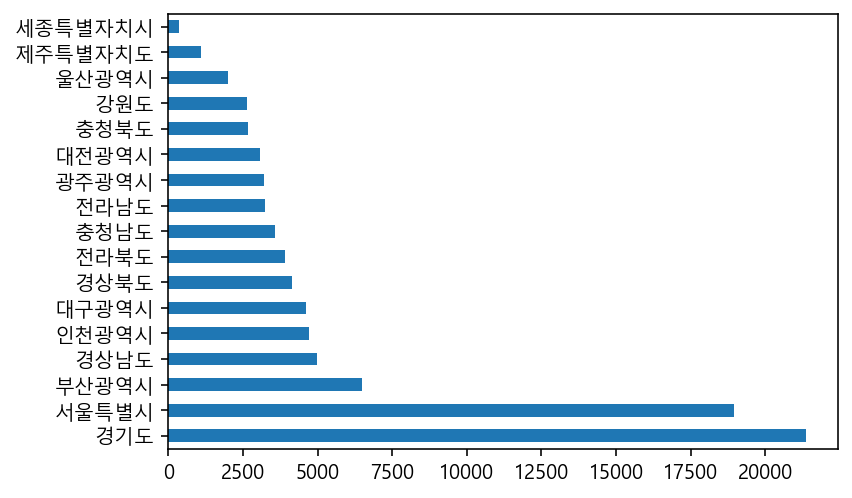

In [39]:
# pandas에는 plot 기능을 내장하고 있다.
# 위에서 분석한 시도명 수를 막대그래프로 표현하기.
# city.plot.area()
# city.plot.bar()
city.plot.barh()
# city.plot.box()


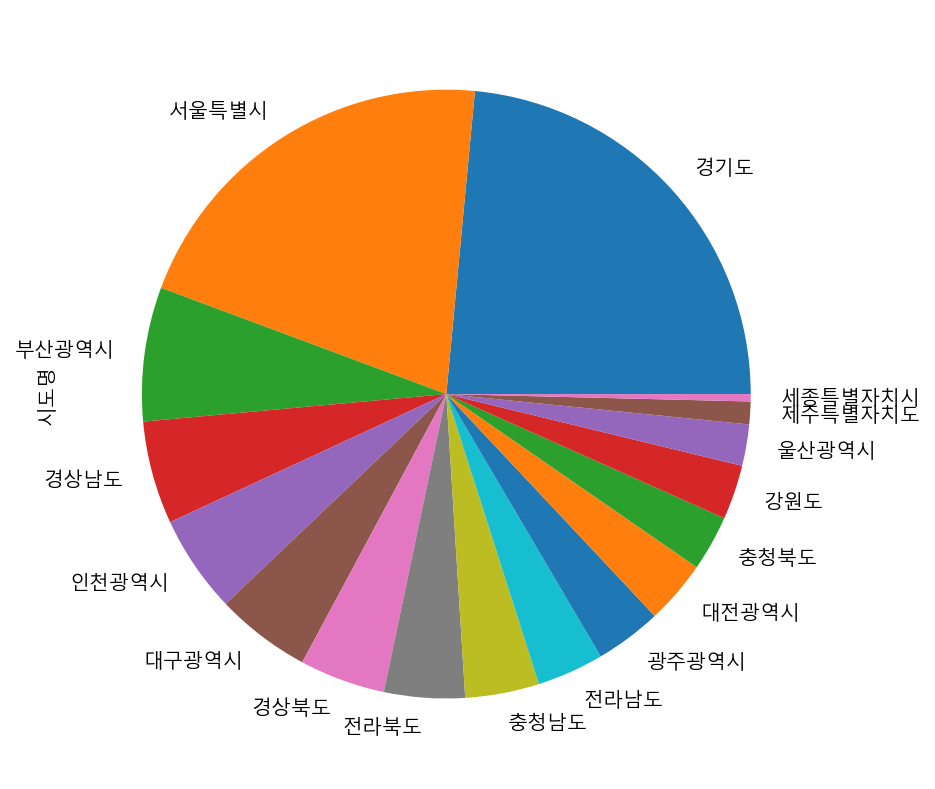

In [40]:
# 판다스의 plot.pie()를 사용해서 파이그래이프로 그리기.
city_normalize.plot.pie(figsize=(7,7))

--- 
- 데이터 요약하기 - seaborn 으로 빈도수 시각화 하기

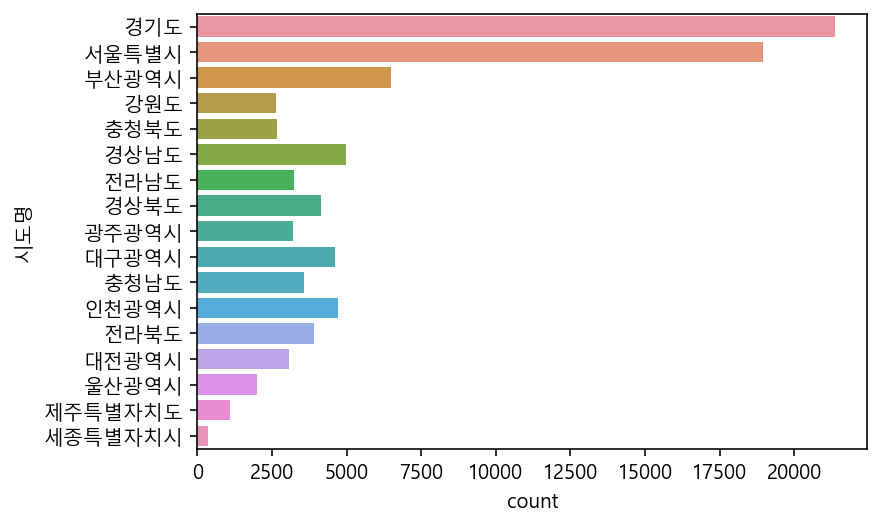

In [41]:
# seaborn의 countplot으로 그리기
sns.countplot(data=df , y='시도명')

In [42]:
# '상권업종대분류명'으로 개수를 세어보기.
df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [43]:
# '상권업종중분류명'으로 개수를 세어보기.
c = df['상권업종중분류명'].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [44]:
# normalize=True를 사용해 비율 구하기.

n = df['상권업종중분류명'].value_counts(normalize= True)

n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

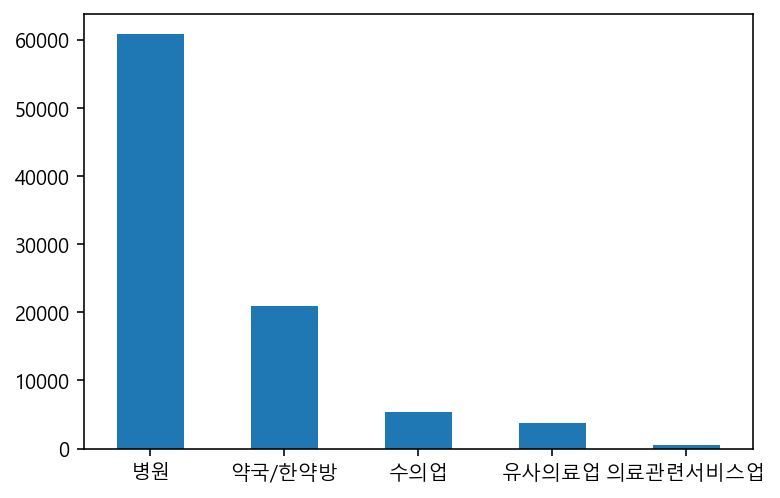

In [45]:
# 판다스의 plot.bar()를 사용해서 막대그래프 그리기. 
c.plot.bar(rot=0)
# n.plot()

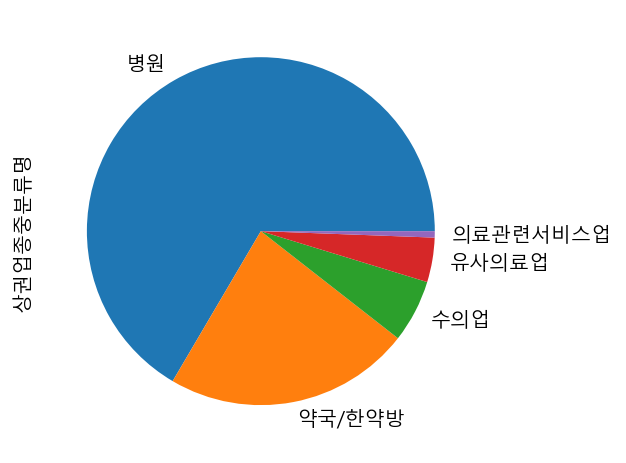

In [46]:
# 판다스의 plot.pie()를 사용해서 파이 그래프 그리기.
n.plot.pie()

In [47]:
# '상권업종소분류명'에 대한 그룹화 된 값을 카운트하기.
k = df['상권업종소분류명'].value_counts()
k

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
수의업-기타         9
접골원            9
제대혈            1
Name: 상권업종소분류명, dtype: int64

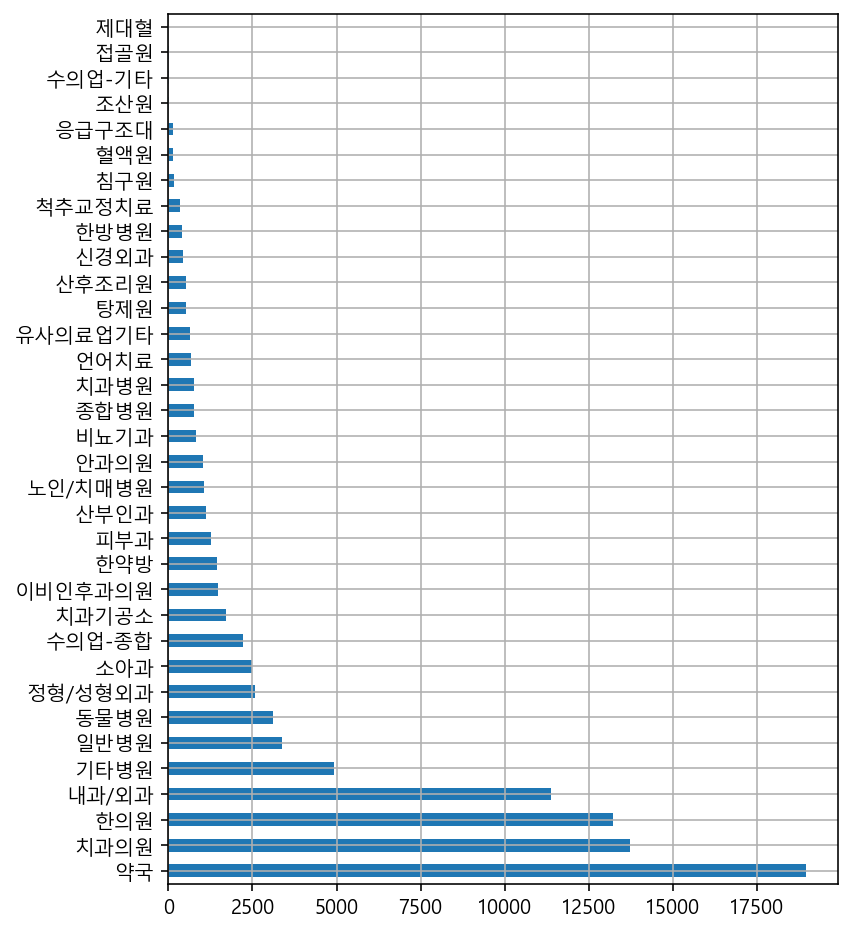

In [48]:
# '상권업종 소분류명'으로 개수를 세어보기.
# 판다스의 plot.ba()를 사용해서 막대그래프 그리기.
k.plot.barh(figsize=(6, 8),grid=True)

# 1.12 데이터 색인하기
- 특정 데이터만 모아서 따로 보기.

In [49]:
# '상권업종중분류명'이 '약국/한약방'인 데이터만 가져온다.
#  df_medical 이라는 변수에 담는다.
# head()를 통해 미리보기를 한다.

df['상권업종중분류명'] == '약국/한약방'      # 불리언 인덱싱 (True/ False)
df_medical = df[df['상권업종중분류명'] == '약국/한약방'].copy()  # 약국/한약방 data만 가져오기. (원본에 영향 없도록 copy)
df_medical.head()

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4   20364049  더블유스토어수지점         S       의료       S02   약국/한약방    S02A01   
6   20733252      춘산한약방         S       의료       S02   약국/한약방    S02A02   
7   20582210      부부탕제원         S       의료       S02   약국/한약방    S02A03   
10  21057519       민생약국         S       의료       S02   약국/한약방    S02A01   
13  21217689     제중당한약방         S       의료       S02   약국/한약방    S02A02   

   상권업종소분류명   시도명    시군구코드  ...                     지번주소         도로명코드  \
4        약국   경기도  41465.0  ...   경기도 용인시 수지구 풍덕천동 712-2  414653205024   
6       한약방   강원도  42110.0  ...         강원도 춘천시 중앙로2가 99  421104454113   
7       탕제원  충청북도  43111.0  ...  충청북도 청주시 상당구 금천동 187-17  431114508623   
10       약국  경상남도  48890.0  ...    경상남도 합천군 용주면 월평리 78-2  488904844473   
13      한약방  전라남도  46830.0  ...     전라남도 영암군 도포면 덕화리 296  468304685396   

                       도로명  건물본번지                     건물관리번호  \
4          경기도 용인시 수지구 문정로     32  4146510100107120002026238   
6              강원도 춘천시 낙원길     50  4211010500101000000023668   
7   충청북도 청주시 상당구 중고개로337번길    134  4311112000101870017042942   
10        경상남도 합천군 용주면 월평길    149  4889046030200780002048274   
13        전라남도 영암군 도포면 인덕길     75  4683035023102960000000001   

                         도로명주소     구우편번호    신우편번호          경도         위도  
4           경기도 용인시 수지구 문정로 32  448170.0  16837.0  127.095522  37.323528  
6               강원도 춘천시 낙원길 50  200042.0  24273.0  127.726905  37.880504  
7   충청북도 청주시 상당구 중고개로337번길 134  360802.0  28726.0  127.499206  36.625355  
10     경상남도 합천군 용주면 월평길 149-35  678912.0  50212.0  128.118615  35.575962  
13      전라남도 영암군 도포면 인덕길 75-10  526832.0  58429.0  126.630348  34.834080  

[5 rows x 29 columns]

In [50]:
# '상권업종대분류명'에서 '의료'데이터만 가져온다.
#  df.loc를 사용하면 행, 열을 함게 가져올 수 있다.
# 이 기능을 통해 '상권업종준분류명'만 가져온다.
# 가져온 결과를 value_counts를 통해 중분류의 개수를 세어본다.

'''
m = df['상권업종대분류명']=='의료'
df.loc[m,'상권업종중분류명'].value_counts()
'''
# 위와 똑같은 기능을 수행하는 코드를 아래와 같이 한 줄에 표현할 수도 있다.
df.loc[df['상권업종대분류명']=='의료','상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [51]:
# 유사의료업만 따로 모으기
# 유사의료업만 df_medi 변수에 담기
df_medi = df[df['상권업종중분류명']=='유사의료업']
df_medi

상가업소번호         상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
22     21013731    세종언어치료센터         S       의료       S03    유사의료업    S03B07   
40     20933900     고려수지침학회         S       의료       S03    유사의료업    S03B03   
97     21717820         청명원         S       의료       S03    유사의료업    S03B09   
102    21865854    응급환자이송센터         S       의료       S03    유사의료업    S03B01   
108    21914637  태화아동발달지원센터         S       의료       S03    유사의료업    S03B07   
...         ...         ...       ...      ...       ...      ...       ...   
91300  16131218     으뜸치과기공소         S       의료       S03    유사의료업    S03B06   
91310  16199325     보령치과기공소         S       의료       S03    유사의료업    S03B06   
91311  16199088       점프셈교실         S       의료       S03    유사의료업    S03B09   
91319  16108560  씨앤디자인치과기공소         S       의료       S03    유사의료업    S03B06   
91327  16190388       오피스알파         S       의료       S03    유사의료업    S03B06   

      상권업종소분류명    시도명    시군구코드  ...                     지번주소         도로명코드  \
22        언어치료  부산광역시  26410.0  ...       부산광역시 금정구 구서동 84-1  264102000010   
40         침구원   경상남도  48123.0  ...     경상남도 창원시 성산구 상남동 5-2  481234784088   
97     유사의료업기타   충청북도  43760.0  ...     충청북도 괴산군 청안면 금신리 241  437604538132   
102      응급구조대  대전광역시  30140.0  ...     대전광역시 중구 대사동 248-237  301404295026   
108       언어치료  대전광역시  30140.0  ...          대전광역시 중구 문화동 27  301404295402   
...        ...    ...      ...  ...                      ...           ...   
91300    치과기공소   경상남도  48170.0  ...       경상남도 진주시 수정동 39-11  481704797625   
91310    치과기공소  서울특별시  11290.0  ...  서울특별시 성북구 동소문동4가 103-11  112903107003   
91311  유사의료업기타   경상북도  47130.0  ...         경상북도 경주시 황성동 446  471304715895   
91319    치과기공소  서울특별시  11545.0  ...      서울특별시 금천구 가산동 60-25  115453116013   
91327    치과기공소    경기도  41173.0  ...   경기도 안양시 동안구 호계동 970-24  411734349013   

                         도로명  건물본번지                     건물관리번호  \
22            부산광역시 금정구 중앙대로   1817  2641010700100840001017686   
40      경상남도 창원시 성산구 마디미로4번길      9  4812312700100050002026799   
97        충청북도 괴산군 청안면 금신로1길     93  4376037022102410000007293   
102        대전광역시 중구 계룡로921번길     40  3014011000102480237013097   
108       대전광역시 중구 보문산로333번길     29  3014011600100270000008172   
...                      ...    ...                        ...   
91300       경상남도 진주시 향교로18번길      8  4817011600100390011004490   
91310         서울특별시 성북구 동소문로     47  1129010700101030014050661   
91311      경상북도 경주시 용담로104번길     16  4713012400104460000024894   
91319          서울특별시 금천구 벚꽃로    234  1154510100100600025000001   
91327  경기도 안양시 동안구 경수대로507번길     28  4117310400109700024005182   

                          도로명주소     구우편번호    신우편번호          경도         위도  
22       부산광역시 금정구 중앙대로 1817-11  609310.0  46273.0  129.091662  35.246528  
40       경상남도 창원시 성산구 마디미로4번길 9  642832.0  51495.0  128.684678  35.224113  
97        충청북도 괴산군 청안면 금신로1길 93  367831.0  28050.0  127.635740  36.768935  
102        대전광역시 중구 계룡로921번길 40  301846.0  34946.0  127.417693  36.321801  
108       대전광역시 중구 보문산로333번길 29  301130.0  35020.0  127.412725  36.312953  
...                         ...       ...      ...         ...        ...  
91300        경상남도 진주시 향교로18번길 8  660180.0  52753.0  128.084600  35.197029  
91310      서울특별시 성북구 동소문로 47-15  136821.0   2832.0  127.010602  37.591455  
91311      경상북도 경주시 용담로104번길 16  780954.0  38084.0  129.211755  35.865600  
91319         서울특별시 금천구 벚꽃로 234  153798.0   8513.0  126.886122  37.475986  
91327  경기도 안양시 동안구 경수대로507번길 28  431849.0  14120.0  126.956365  37.367779  

[3774 rows x 29 columns]

In [52]:
# 상호명을 그룹화해서 개수 세기.
# value_counts0를 사용해서 상위 10개 출력
df['상호명'].value_counts().head()

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
Name: 상호명, dtype: int64

In [53]:

# df_medi 변수에서 상호명으로 개수 세기
# 가장 많은 상호 상위 10개 출력
df_medi['상호명'].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
어울림치과기공소     8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

# 1.12.1 여러 조건으로 색인하기

In [54]:
# '상권업종소분류명'이 '약국'인 것과 '시도명'이 '서울특별시'인 데이터 가져오기.

df['상권업종소분류명'] == '약국'
df['시도명'] =='서울특별시'

# 한번에 표현하기 (서울에 있는 약국)
df_seoul_drug= df[(df['상권업종소분류명'] == '약국' )& (df['시도명'] =='서울특별시')]
df_seoul_drug.shape

(3579, 29)

# 1.12.2 구별로 보기

In [55]:
# 위에서 색인한 데이터로 '시군구명'으로 그룹화 개수 세어보기.
# 구별로 약국이 몇개가 있는지 확인
c = df_seoul_drug['시군구명'].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [56]:
# normalize = True를 통해 비율을 구하기.
n = df_seoul_drug['시군구명'].value_counts(normalize = True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

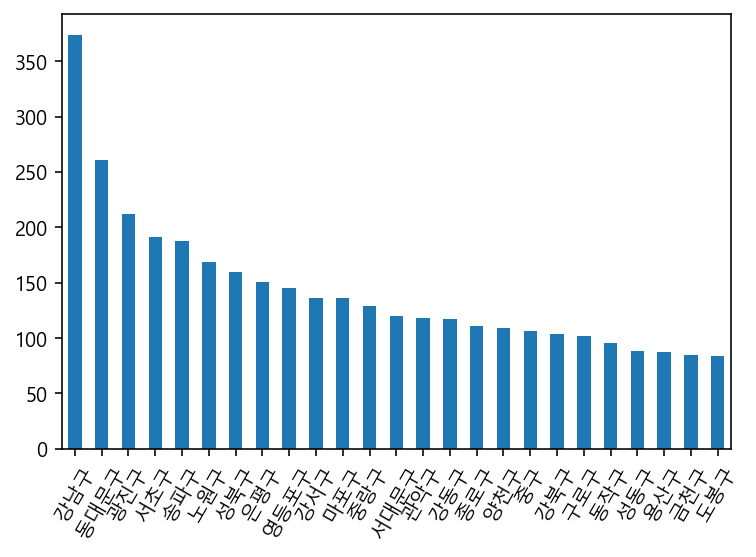

In [57]:
# 위에서구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그리기
c.plot.bar(rot= 60)

In [58]:
# '상권업종소분류명'이 '종합병원'인 것과
# '시도명'이 '서울특별시'인 데이터만 가져오기.
# 결과를 df_seoul_hospital에 할당해서 재사용.
df_seoul_hospital = df[(df['상권업종소분류명']=='종합병원' ) & (df['시도명']=='서울특별시')].copy()
# df_seoul_hospital

In [59]:
# '시군구명'으로 그룹화해서 구별로 종합병원의 수를 세어보기.
df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
송파구      5
중구       5
강동구      5
서대문구     4
도봉구      4
양천구      4
강북구      4
성북구      3
강서구      2
종로구      2
중랑구      2
금천구      2
노원구      2
구로구      2
관악구      2
성동구      2
동대문구     2
은평구      1
동작구      1
용산구      1
마포구      1
Name: 시군구명, dtype: int64

# 1.12.3 텍스트 데이터 색인하기


In [60]:
# 색인하기 전에 상호명 중에 종합병원이 아닌 데이터를 찾아봅니다.
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'),'상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [61]:
# 특정 단어가 들어가는 데이터만 가져옵니다. -의료기
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('의료기')]

상가업소번호               상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1917  23210677  평화드림여의도성모병원의료기매장         S       의료       S01       병원   

     상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                지번주소  \
1917    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 여의도동 62   

             도로명코드             도로명  건물본번지                     건물관리번호  \
1917  115603118001  서울특별시 영등포구 63로     10  1156011000100620000031477   

                  도로명주소     구우편번호   신우편번호          경도         위도  
1917  서울특별시 영등포구 63로 10  150713.0  7345.0  126.936693  37.518296  

[1 rows x 29 columns]

In [62]:
 # '꽃배달|의료기|장례식장|상담소|어린이집'은 종합병원과 무관하기 때문에 전처리를 위해 해당 텍스트를 한 번에 검색
# 제거할 데이터의 인덱스만 drop_row에 담아주고 list 형태로 변환한다.
drop_row = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [63]:
# 의원으로 끝나는 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾아서
# drop_row2에 담아주고 list 형태로 변환합니다.
# endswith : 마지막에 특정 스트링으로 끝나는 문자열 
drop_row2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith('의원')].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [64]:
# 삭제할 행을 drop_row에 합쳐준다.
drop_row =  drop_row + drop_row2
len(drop_row)

33

In [65]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 개수 비교하기
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


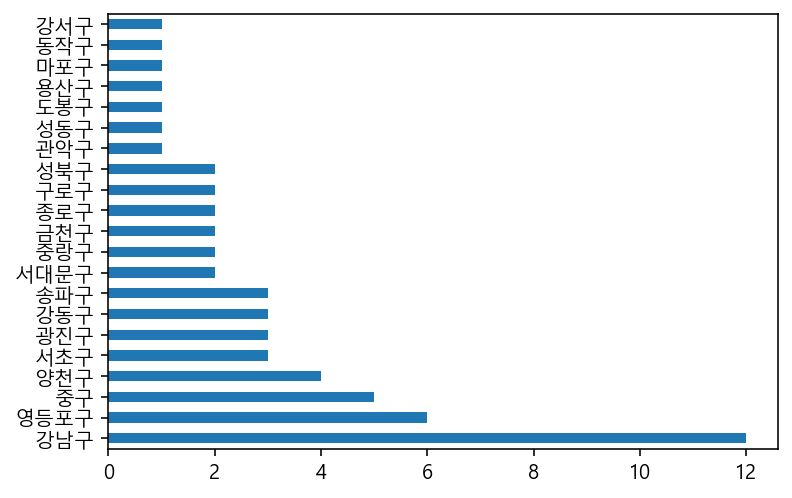

In [66]:
# 시군구명에 따라 종합병원의 숫자를 count.plot으로 표현하기.
df_seoul_hospital['시군구명'].value_counts().plot.barh()

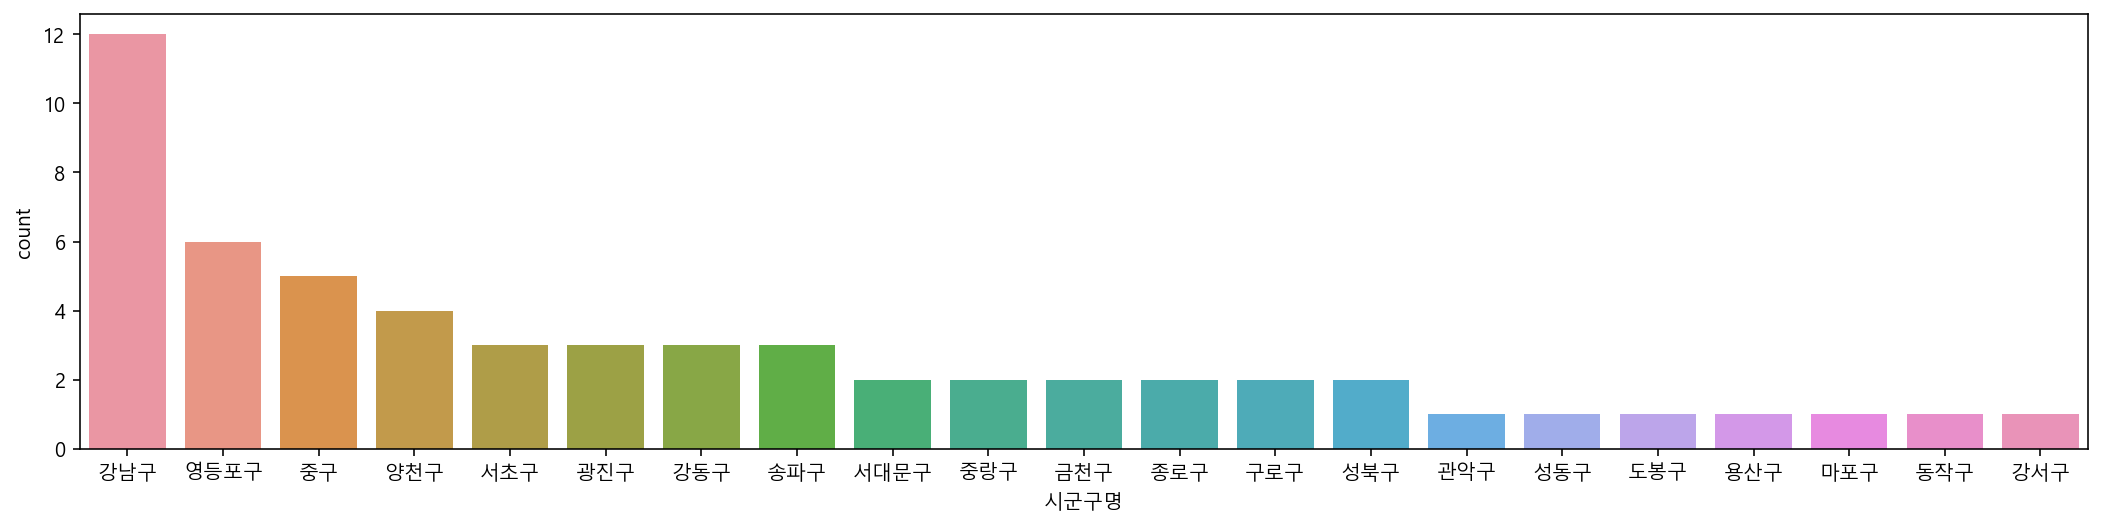

In [67]:
plt.figure(figsize=(18,4))

sns.countplot(data=df_seoul_hospital, x='시군구명', 
             order=df_seoul_hospital['시군구명'].value_counts().index)

In [68]:
df_seoul_hospital['상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

# 1.12.4 특정 지역만 보기


In [69]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장식 copy()를 사용합니다.
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(18943, 29)

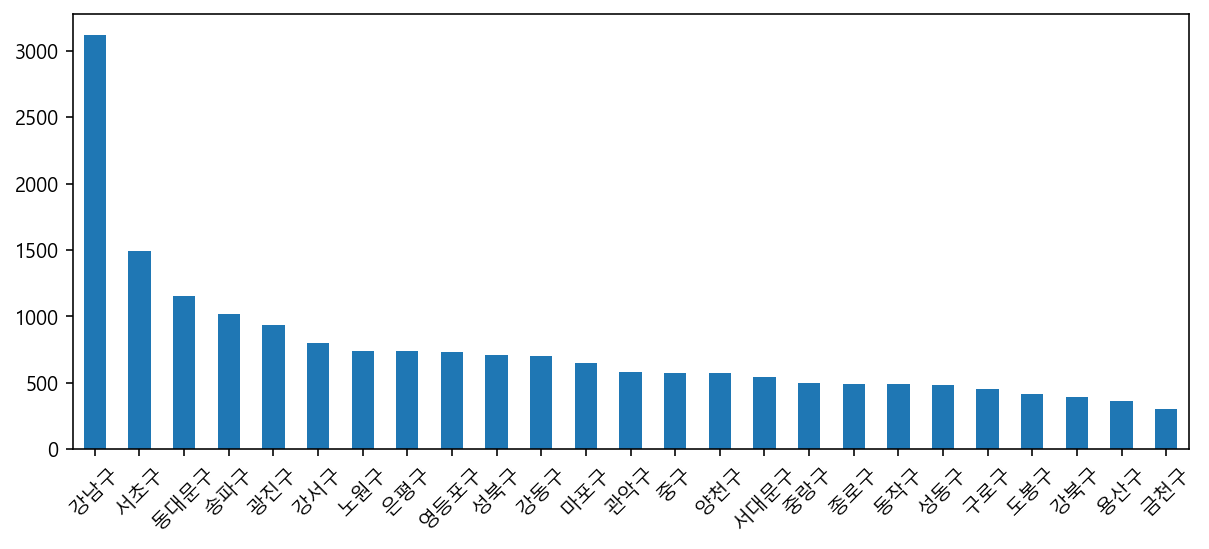

In [70]:
# matplit의 plot(bar)을 사용해서 위에서 만든 df_seoul 데이터프레임의 시군구명을 시각화 합니다.
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10,4),rot=45)

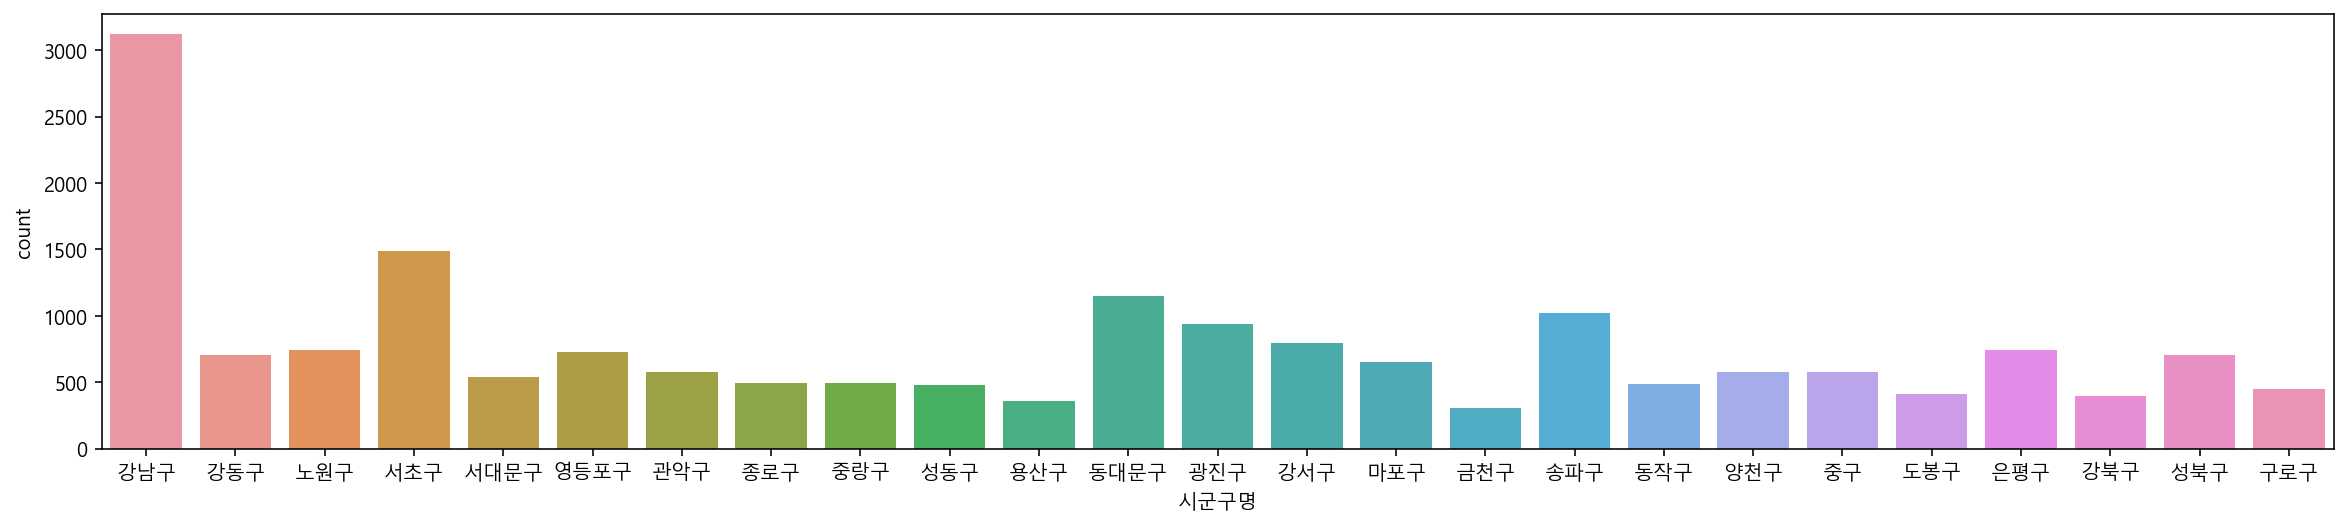

In [71]:
# seaborn의 countplot을 사용해서 위에서 만든 df_seoul 데이터프레임의 시군구명을 시각화 합니다.

plt.figure(figsize=(20,4))
sns.countplot(data=df_seoul, x ='시군구명')

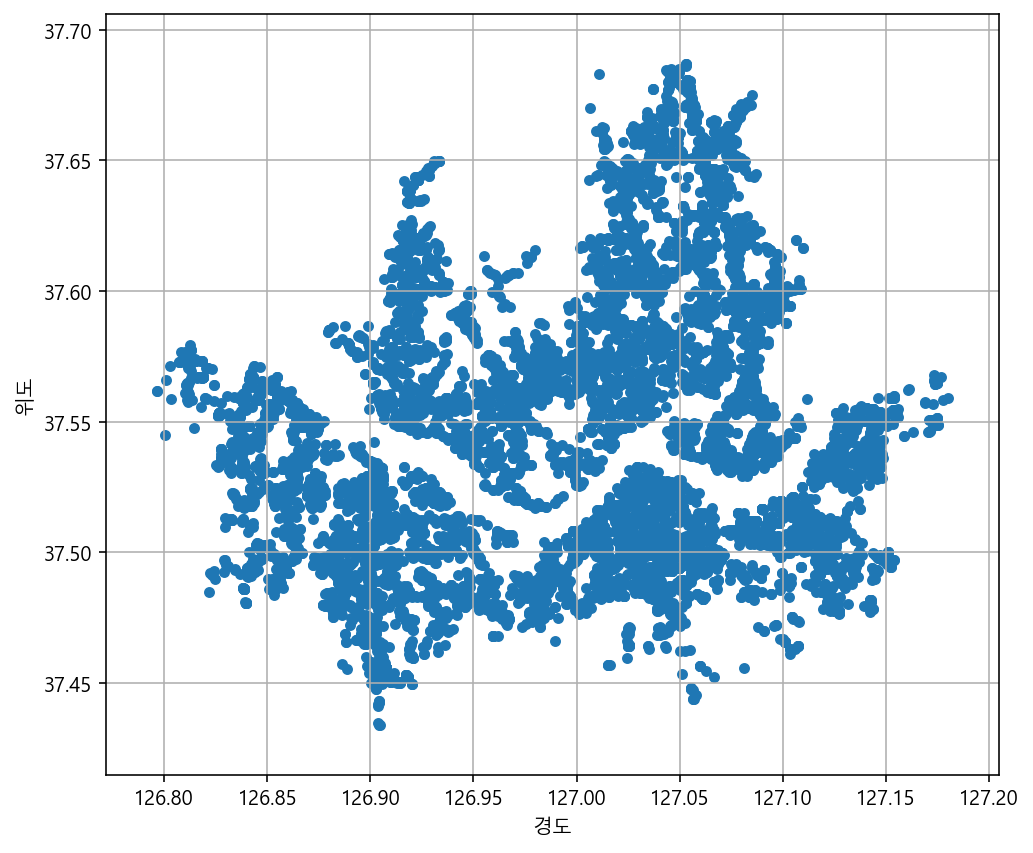

In [72]:
# pandas의 plot.scatter를 통해 경도와 위도를 표시
df_seoul[['경도','위도','시군구명']].plot.scatter(x='경도',y='위도',figsize=(8,7),grid=True)

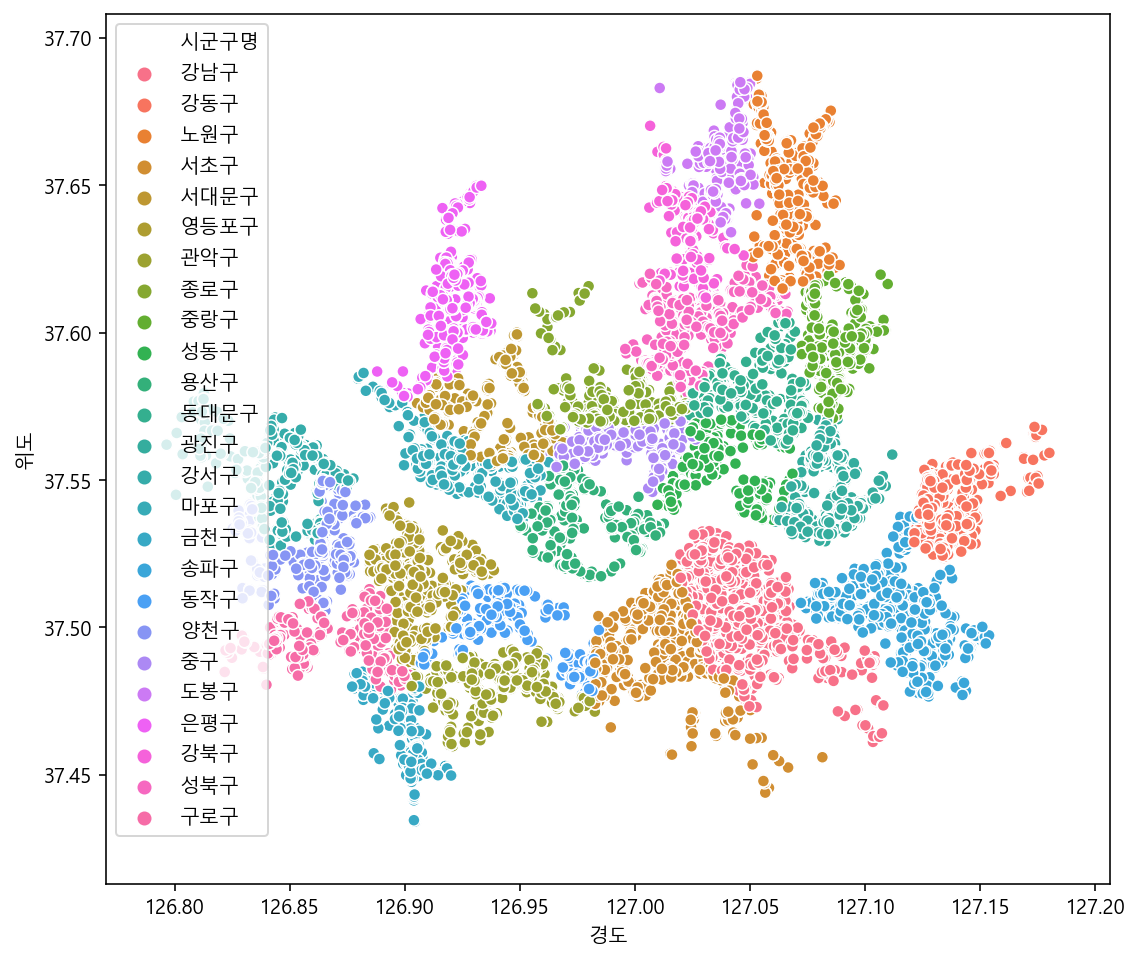

In [73]:
# seaborn의 scatterplot을 통해 경도와 위도를 표시합니다.
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x='경도',y='위도',hue='시군구명')

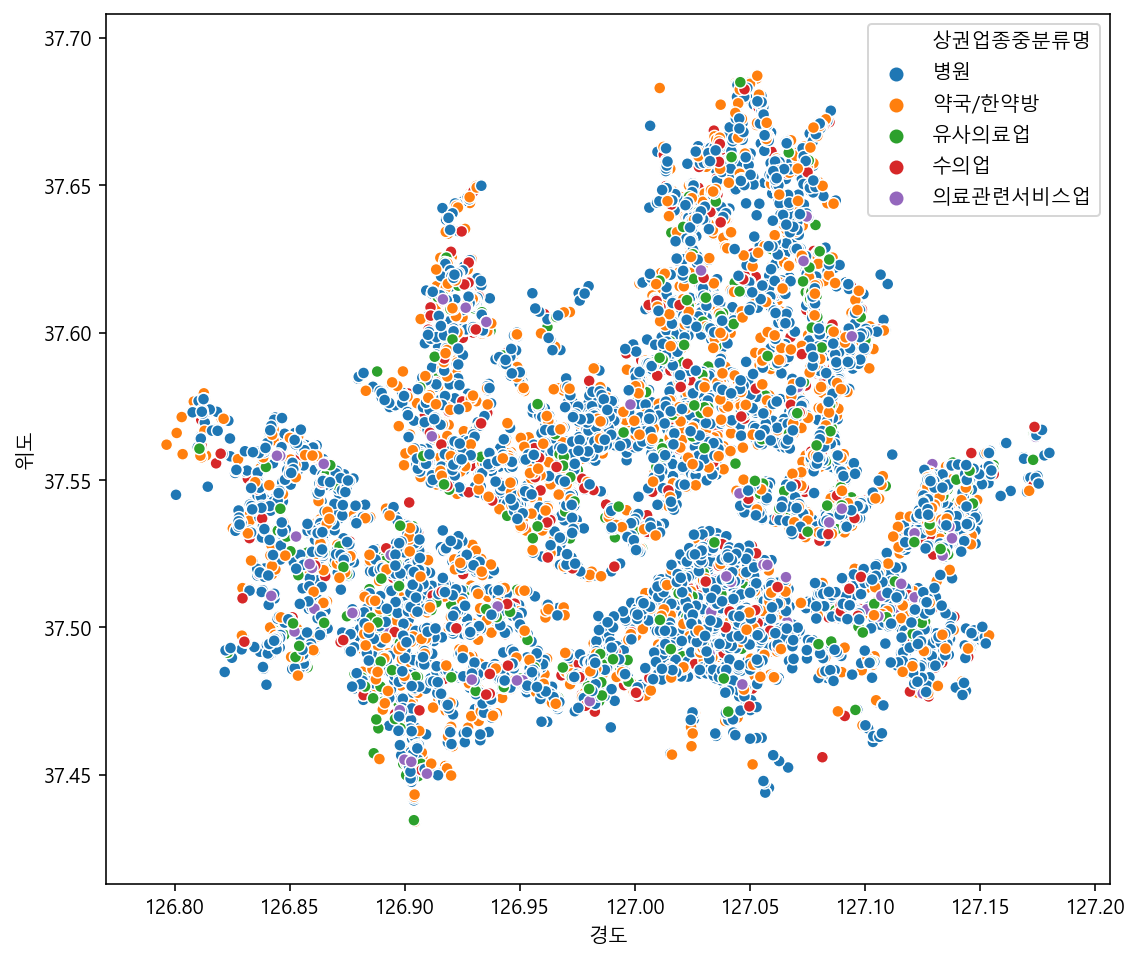

In [74]:
# seaborn의 scatterplot을 통해 '상권업종중분류명'의 경도와 위도를 표시합니다.

plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x='경도',y='위도',hue='상권업종중분류명')

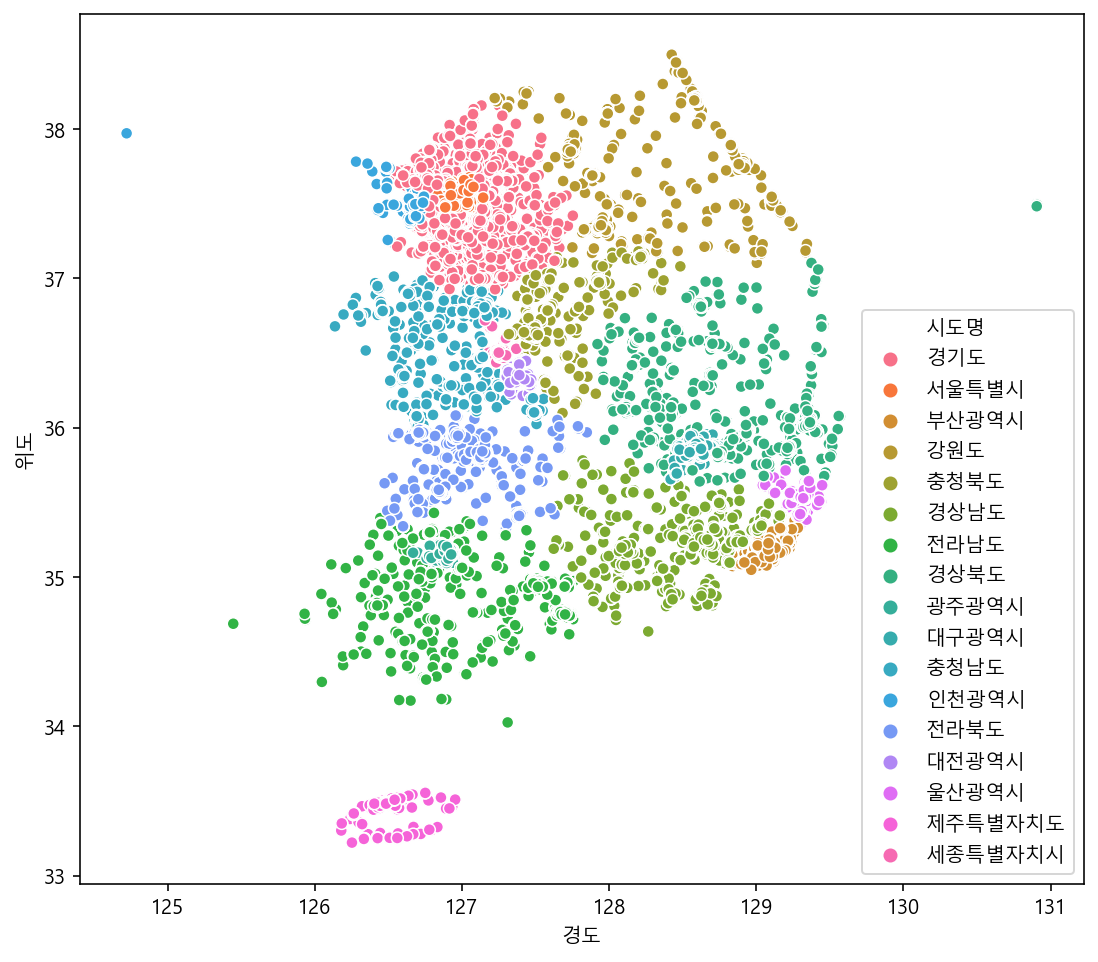

In [75]:
# seaborn의 scatterplot을 통해  데이터(df)로 구별 경도와 위도를 표시합니다.

plt.figure(figsize=(9,8))
sns.scatterplot(data=df, x='경도',y='위도',hue='시도명')

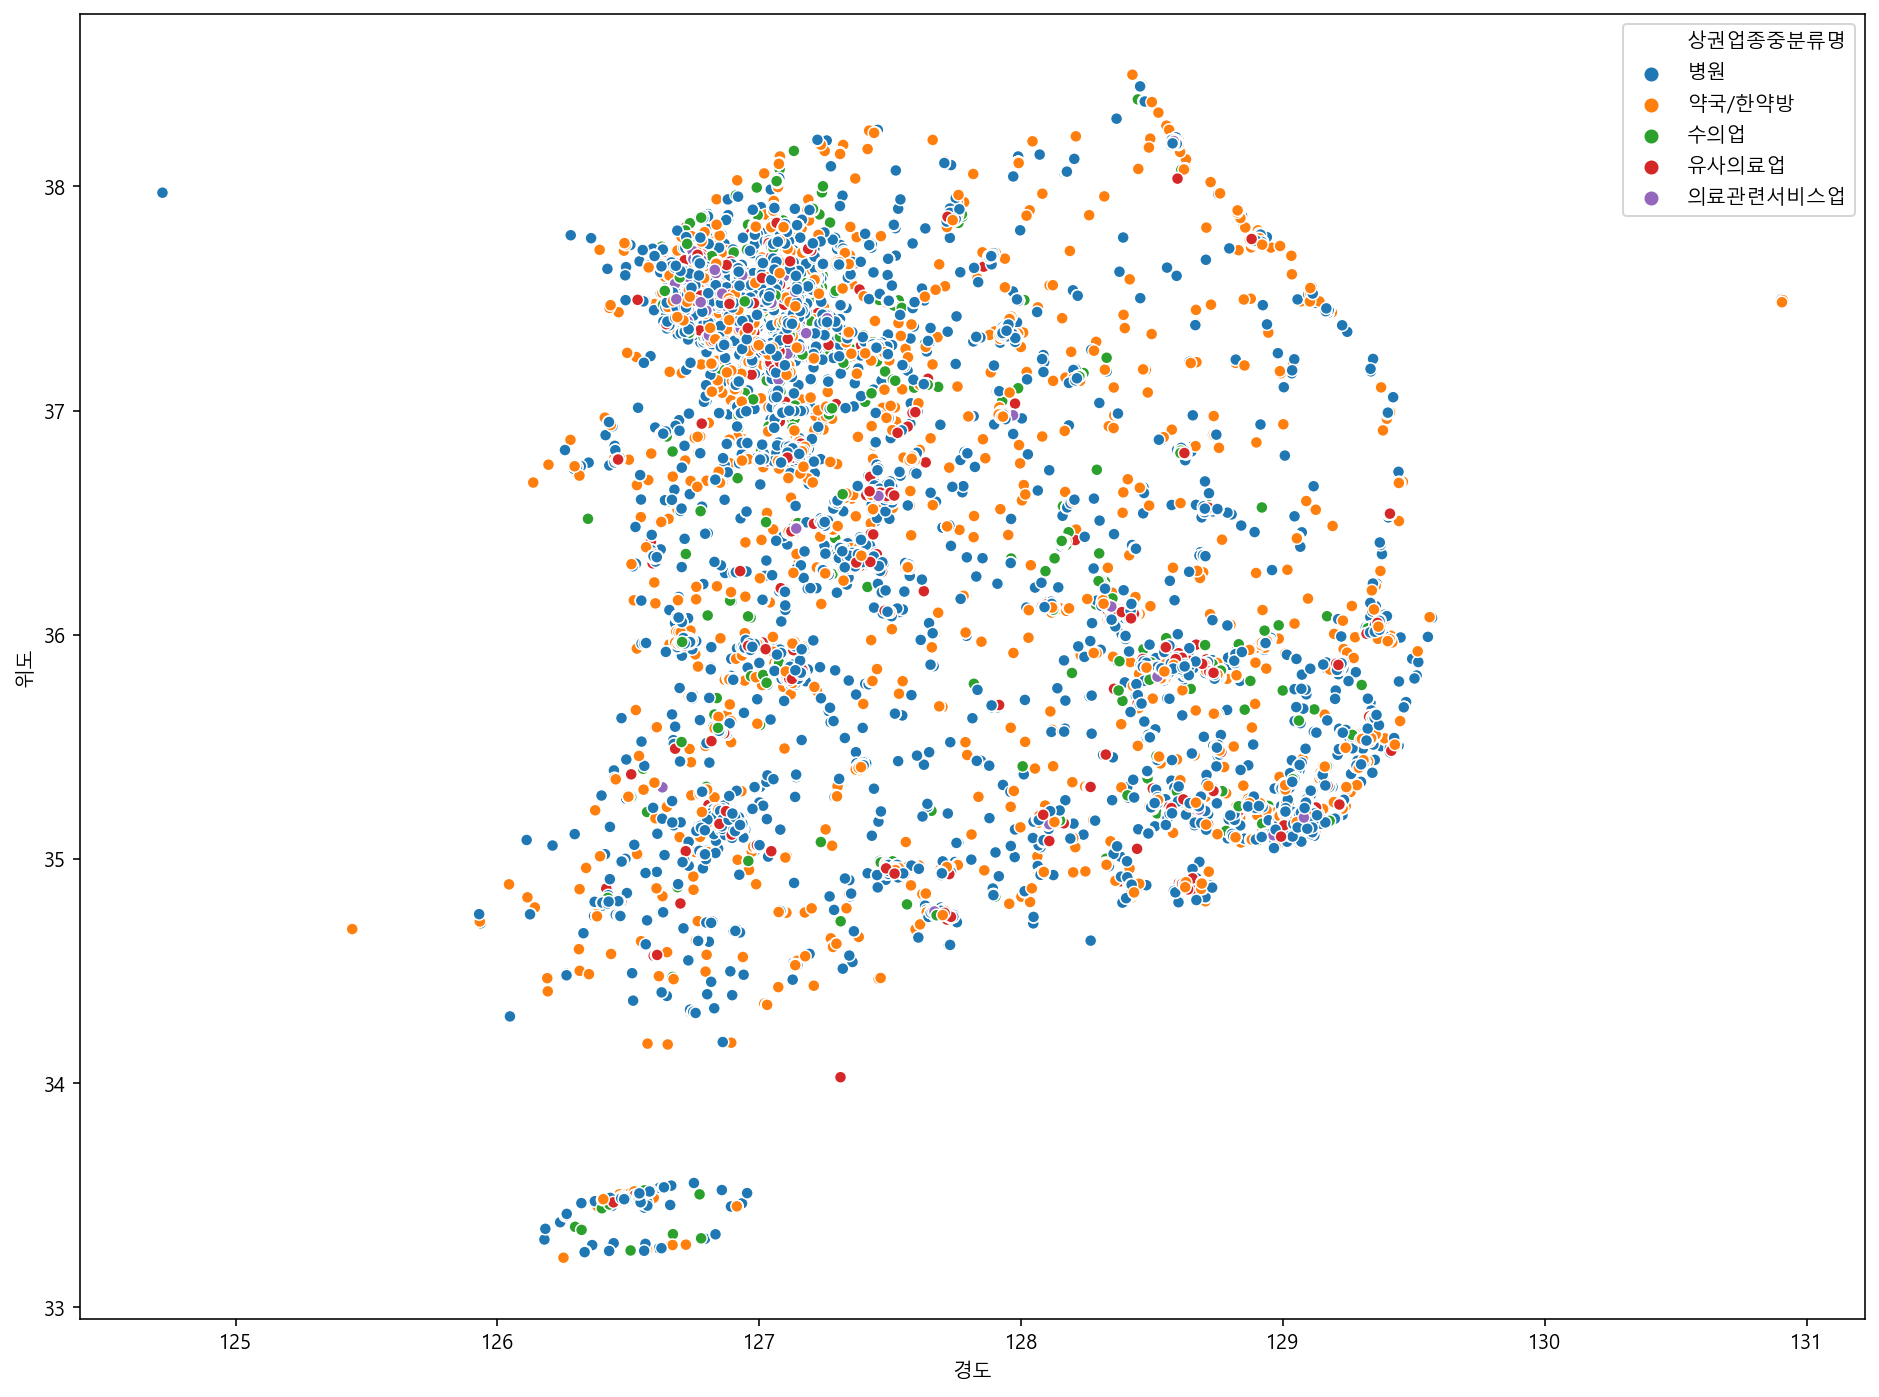

In [76]:
# seaborn의 scatterplot을 통해  데이터(df)로 구별 경도와 위도를 표시합니다.

plt.figure(figsize=(16,12))
sns.scatterplot(data=df, x='경도',y='위도',hue='상권업종중분류명')

# 1.13 Folium으로 지도 활용하기

In [97]:
import folium
folium.Map()


In [99]:
random_map = folium.Map(location=[37.5236,127.660])
random_map

In [101]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기.
df_seoul_hospital['위도'].mean()
df_seoul_hospital['경도'].mean()

126.9963589356625

In [110]:
folium.Map(location=[df_seoul_hospital['위도'].mean(),df_seoul_hospital['경도'].mean()])

In [122]:
#zoom_start : 확대
map = folium.Map(location=[df_seoul_hospital['위도'].mean(),df_seoul_hospital['경도'].mean()],zoom_start=12)
map

In [123]:
# 임의의 병원 지도 위에 마커 표시하기
for n in df_seoul_hospital.index:
    name =df_seoul_hospital.loc[n,'상호명'] 
    address = df_seoul_hospital.loc[n,'도로명주소']
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n,'위도'],df_seoul_hospital.loc[n,'경도']]
    folium.Marker(location = location, popup = popup).add_to(map)
map
    
    #     print(popup
    

In [124]:
map.save('index.html')